Importing Libraries 📚

In [2]:
# Importing libraries that will be used in this Notebook.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

Data Collection & Processing

In [3]:
# Loading the csv data to a Pandas Dataframe
gold_data = pd.read_csv("/kaggle/input/gold-price-data/gld_price_data.csv")

In [4]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [5]:
# first 5 rows of the dataframe
gold_data.head() 

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#Using hide_index() from the style function
gold_data.head().style.hide_index()

Date,SPX,GLD,USO,SLV,EUR/USD
1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099


In [7]:
#Gradient background color for the numerical columns
gold_data.head(10).style.background_gradient(cmap='Reds')

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [8]:
# last 5 rows of the dataframe
gold_data.tail() 

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [9]:
# last 10 rows of the dataframe (Gradient background color)
gold_data.tail(10).style.background_gradient(cmap = 'Blues')

,Date,SPX,GLD,USO,SLV,EUR/USD
2280,4/30/2018,2648.050049,124.589996,13.800000,15.380000,1.208123
2281,5/1/2018,2654.800049,123.709999,13.610000,15.240000,1.199156
2282,5/2/2018,2635.669922,123.650002,13.670000,15.420000,1.195100
2283,5/3/2018,2629.729980,124.279999,13.820000,15.460000,1.198926
2284,5/7/2018,2672.629883,124.570000,14.100000,15.520000,1.193374
2285,5/8/2018,2671.919922,124.589996,14.060000,15.510000,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.530000,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.740000,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.560000,1.193118
2289,5/16/2018,2725.780029,122.543800,14.405800,15.454200,1.182033


In [10]:
# number of rows(2290) and columns(6)
gold_data.shape 

(2290, 6)

In [11]:
# the label of each column in the DataFrame
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [12]:
# getting some informations about the dataset
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


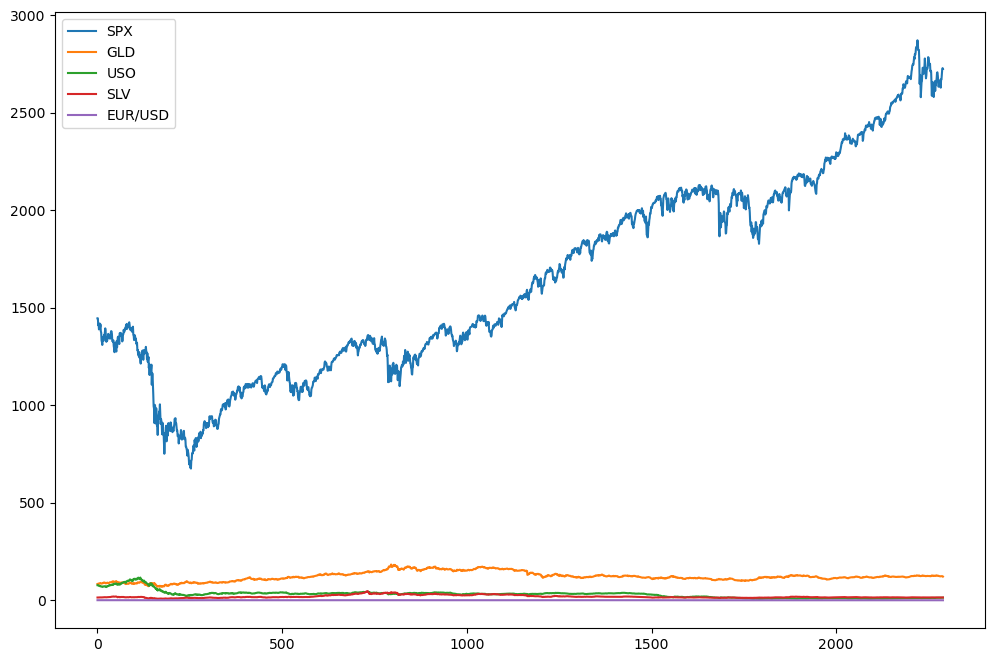

In [13]:
plt.rcParams['figure.figsize'] = [12, 8]#resize the plot
#plt.figure(figsize = (12, 8))

gold_data.plot()
plt.show()

In [14]:
# Check for null values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
#Detect missing values
gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
# statistical Measures of the dataset 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [17]:
# Transpose index and columns.(Gradient background color)
gold_data.describe().T.style.background_gradient(cmap = 'Blues')

,count,mean,std,min,25%,50%,75%,max
SPX,2290.000000,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.000000,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.000000,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.000000,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.000000,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [18]:
#mean
gold_data.mean()

SPX        1654.315776
GLD         122.732875
USO          31.842221
SLV          20.084997
EUR/USD       1.283653
dtype: float64

**we will not use the colum of date becouse our data does not depend on it.
so we will deal with the other missing values.**

In [19]:
# drop the "date",after the cor
data = gold_data.drop(['Date'], axis=1)

In [20]:

#To check for duplicates
data.duplicated().sum()

0

In [21]:
# Check for null values
data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

**visualization**

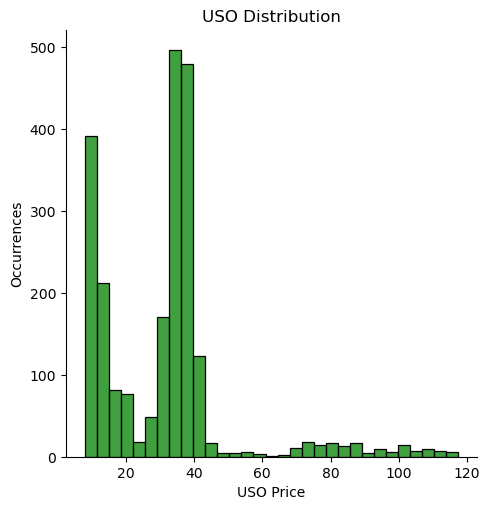

In [22]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['USO'], color='green')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

In [23]:
q = data["USO"].quantile(0.98)
data[data["USO"] > q]
data = data[(data["USO"] < q)]

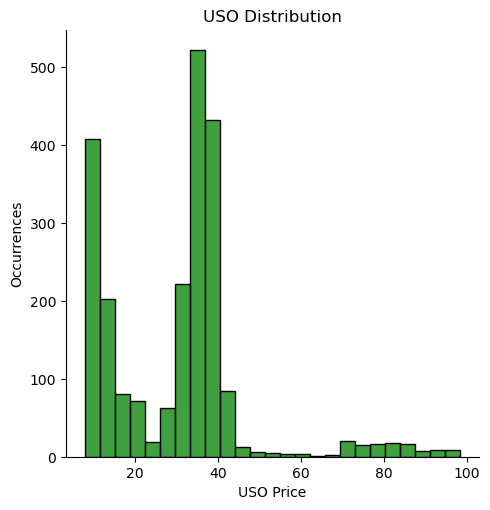

In [24]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['USO'], color='green')
plt.title('USO Distribution')
plt.xlabel('USO Price')
plt.ylabel('Occurrences')
plt.show()

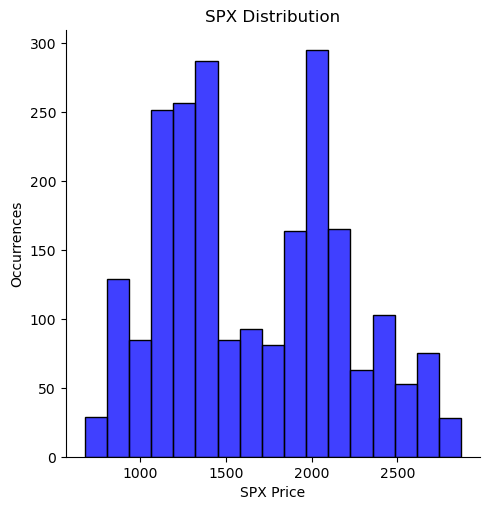

In [25]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SPX'], color='blue')
plt.title('SPX Distribution')
plt.xlabel('SPX Price')
plt.ylabel('Occurrences')
plt.show()

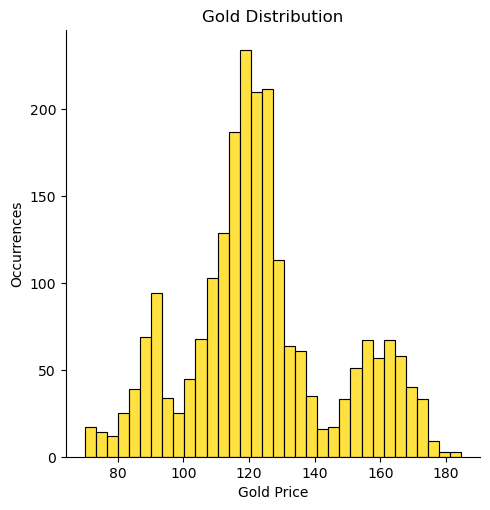

In [26]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['GLD'], color='gold')
plt.title('Gold Distribution')
plt.xlabel('Gold Price')
plt.ylabel('Occurrences')
plt.show()

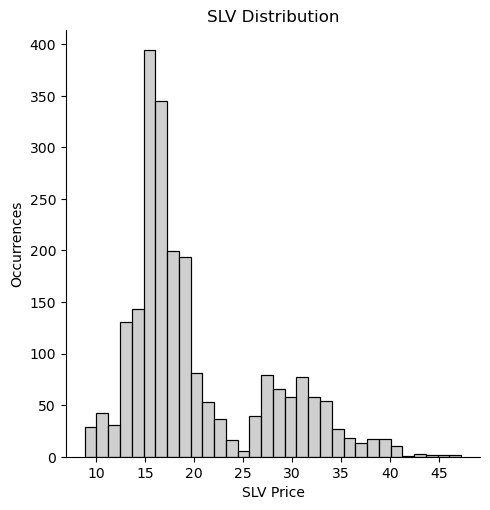

In [27]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['SLV'], color='silver')
plt.title('SLV Distribution')
plt.xlabel('SLV Price')
plt.ylabel('Occurrences')
plt.show()

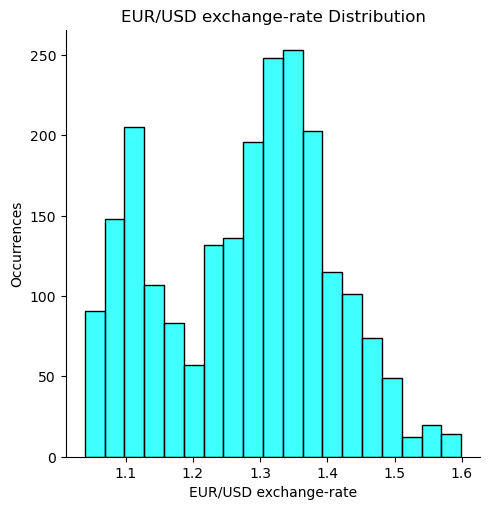

In [28]:
#checking the distribution of the Gold Price.about outliers
sns.displot(data['EUR/USD'], color='cyan')
plt.title('EUR/USD exchange-rate Distribution')
plt.xlabel('EUR/USD exchange-rate')
plt.ylabel('Occurrences')
plt.show()

**Correlation**

In [29]:
# Compute pairwise correlation of columns 
# to identity the highly correlated features.
correlation = data.corr()

<Axes: >

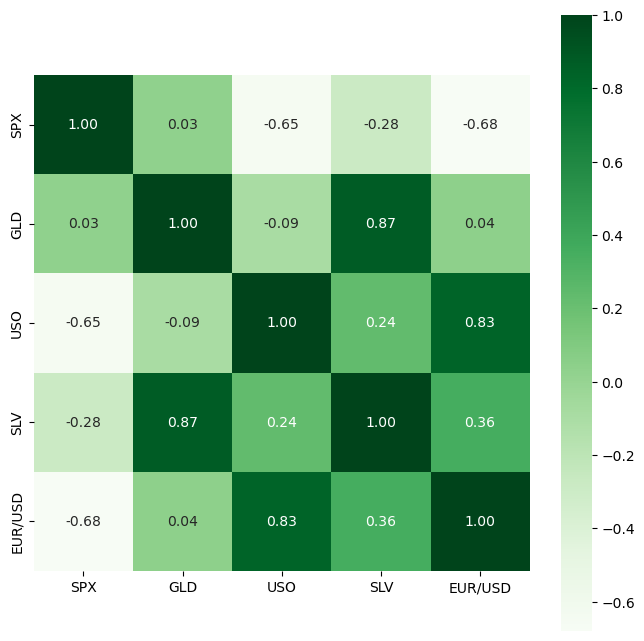

In [30]:
# Construct a heatmap to undestand the correlation
plt.figure(figsize= (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':10}, cmap='Greens')

In [31]:
# correlation values of Gold
print(correlation['GLD'])

SPX        0.032141
GLD        1.000000
USO       -0.091204
SLV        0.874769
EUR/USD    0.040271
Name: GLD, dtype: float64


Splitting the data into a Training dataset & Testing dataset

In [32]:
# discard the gold and use the rest values as features
X = data.drop(['GLD'], axis=1)

# use the gold as the target
Y = data['GLD']

In [33]:
# The Features (input)
X
# The Features (input)(Gradient background color)
#X.style.background_gradient(cmap='Reds')

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [34]:
# The target
Y
# The target(Gradient background color)
#Y.style.background_gradient(cmap='Reds')

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2244, dtype: float64

In [35]:
# Split arrays or matrices into random train and test subsets
#random_state #Testing the model with 20% of the dataset & training it with 80% of the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)


**Model Training: Random Forest Regressor**

In [36]:
regressor = RandomForestRegressor(n_estimators=100)

In [37]:
regressor

RandomForestRegressor()

In [38]:
# training the model
regressor.fit(X_train, Y_train)

RandomForestRegressor()

Evalutation

In [39]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [40]:
print(test_data_prediction)

[ 85.98489947 104.57649766 127.19399711 132.22560174  95.89220004
 125.64060145 165.61040123  91.7441989   75.34089918 120.18410055
 146.67029781 127.08009977 125.09420013 116.28999823 133.46890261
 102.84079888 106.98619917 133.61560032  87.48399929 139.30890018
 112.36710025 124.70310094 117.31680008 114.0954009  117.08400035
 120.02280164 159.67469971 119.08930024 154.0081009  145.21640134
 117.24749987 118.02723921  87.88459964 160.71129838 147.52689966
 117.79780113 110.04209996 111.5125011  160.03429565 111.85219917
 140.6526988  115.17080054 122.91079925  72.28270171 126.18419973
 168.10869828 108.08020015 107.26450135 125.22029983 154.05150082
  94.02789967 160.18069577  90.95179831 112.78630171 109.70759719
  84.34009992 156.5802999  156.27100198 128.02970072 172.22309817
 165.73560247 123.97929917 107.6374011   79.60130015 118.66379932
 128.72199855  93.22559919 154.56900184 126.0771017  137.57300416
 125.53640158 100.578099   123.81830163 114.46920012 171.3259027
 120.435700

In [41]:
# R Squared error
error_score = metrics.r2_score(Y_test, test_data_prediction) # coefficient of determination, regression score function.
print('R squared error : ', error_score)

R squared error :  0.9884797167352747


**Compare the Actual Values and Predicted Values in a Plot**

In [42]:
Y_test = np.array(Y_test)
#Y_test = list(Y_test) #Converting the actual values to a list,so that it can be in the same format as the test_data_prediction


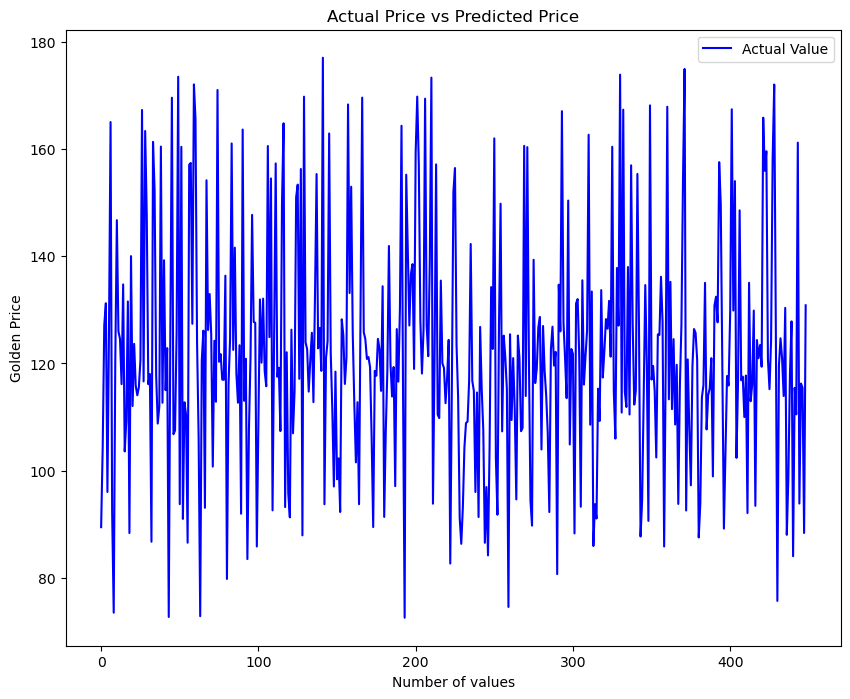

In [43]:
plt.rcParams['figure.figsize'] = [10, 8]#resize the plot
plt.plot(Y_test, color='blue', label='Actual Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

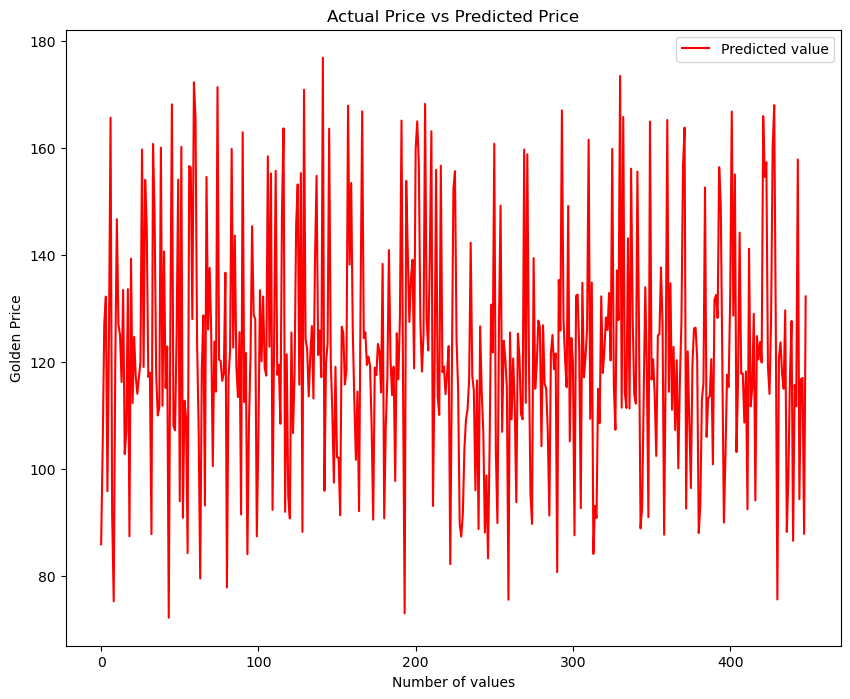

In [44]:
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

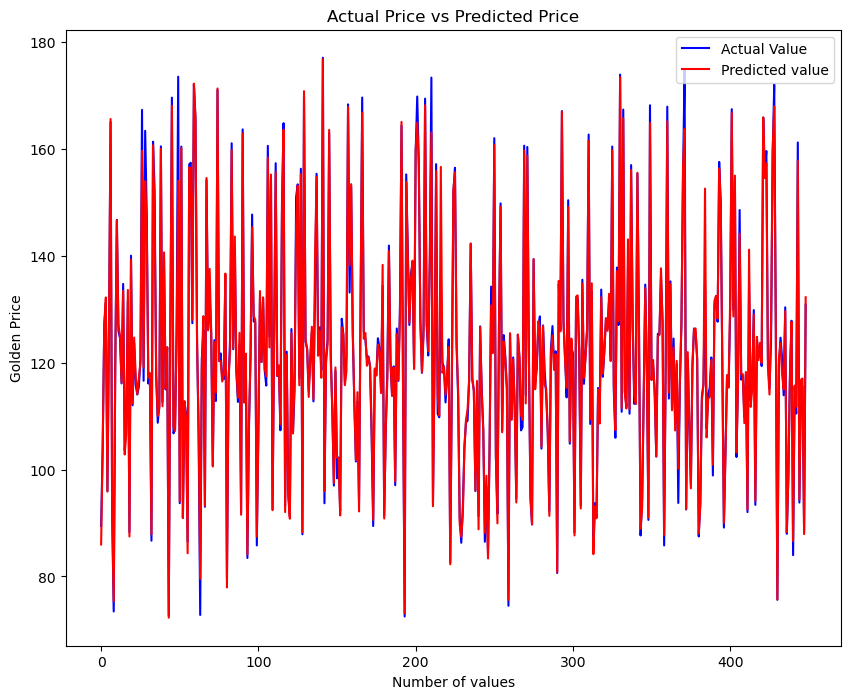

In [45]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='red', label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Golden Price')
plt.legend()
plt.show()

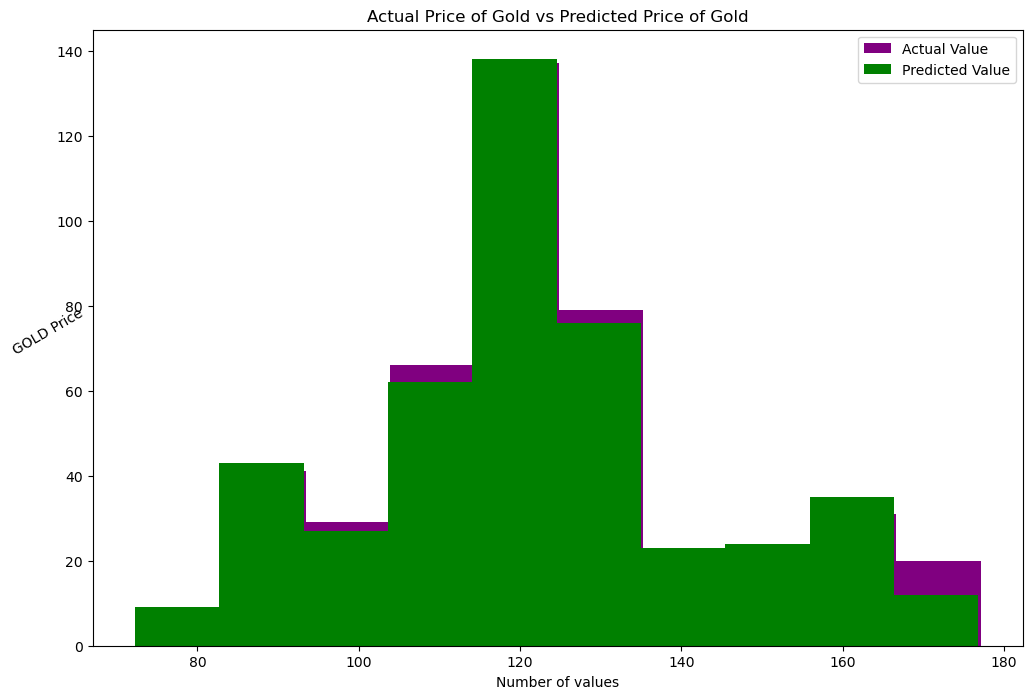

In [46]:
plt.figure(figsize = (12,8))
plt.hist(Y_test, color='purple', label = 'Actual Value')
plt.hist(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price of Gold vs Predicted Price of Gold')
plt.xlabel('Number of values')
plt.ylabel('GOLD Price', rotation=30)
plt.legend()
plt.show()

**Building a System to use the model**

In [47]:
def convertor(user_input):
    
    for i in range(len(user_input)):
        user_input[i] = float(user_input[i])

    print("values = ", tuple(user_input))
    return tuple(user_input)

In [48]:
'''
print("how many values will you calculate: (NOTE: Press q to break)")
count = int(input())

while (count != 0):
    
    count = count-1
    input_string = input()
    user_input = input_string.split()
    if(input_string.lower() == "q"): 
        print("END")
        break
    input_data = convertor(user_input) 
    # changing input_data to a numpy array
    input_data_as_numpy_array = np.asarray(input_data)

    # reshape the array
    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)#search

    # implementing the trained model
    prediction = regressor.predict(input_data_reshaped)
    print(prediction)

    print('The cost of the gold is:', prediction[0])
'''

'\nprint("how many values will you calculate: (NOTE: Press q to break)")\ncount = int(input())\n\nwhile (count != 0):\n    \n    count = count-1\n    input_string = input()\n    user_input = input_string.split()\n    if(input_string.lower() == "q"): \n        print("END")\n        break\n    input_data = convertor(user_input) \n    # changing input_data to a numpy array\n    input_data_as_numpy_array = np.asarray(input_data)\n\n    # reshape the array\n    input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)#search\n\n    # implementing the trained model\n    prediction = regressor.predict(input_data_reshaped)\n    print(prediction)\n\n    print(\'The cost of the gold is:\', prediction[0])\n'

In [49]:
# 1310.5 70.550003 15.902 1.464794              # row_15  ~ 88.169998
# 1336.910034 69.800003 16.674999 1.483107      # row_21  ~ 92.059998
# 1556.219971 33.040001 28.02 1.298802          # row_1144 ~ 152.990005